<!-- Autogenerated by `scripts/make_examples.py` -->
<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/voxel51/fiftyone-examples/blob/master/examples/working_with_feature_points.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791629-6e618700-5769-11eb-857f-d176b37d2496.png" height="32" width="32">
            Try in Google Colab
        </a>
    </td>
    <td>
        <a target="_blank" href="https://nbviewer.jupyter.org/github/voxel51/fiftyone-examples/blob/master/examples/working_with_feature_points.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791634-6efa1d80-5769-11eb-8a4c-71d6cb53ccf0.png" height="32" width="32">
            Share via nbviewer
        </a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/voxel51/fiftyone-examples/blob/master/examples/working_with_feature_points.ipynb">
            <img src="https://user-images.githubusercontent.com/25985824/104791633-6efa1d80-5769-11eb-8ee3-4b2123fe4b66.png" height="32" width="32">
            View on GitHub
        </a>
    </td>
    <td>
        <a href="https://github.com/voxel51/fiftyone-examples/raw/master/examples/working_with_feature_points.ipynb" download>
            <img src="https://user-images.githubusercontent.com/25985824/104792428-60f9cc00-576c-11eb-95a4-5709d803023a.png" height="32" width="32">
            Download notebook
        </a>
    </td>
</table>


# Working with Feature Points

This notebook demonstrates how to compute feature points for images and visualize them in [FiftyOne](https://github.com/voxel51/fiftyone).

Specifically, we'll compute [ORB features](https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html) using  OpenCV, which is installed by default along with FiftyOne.

## Setup

Make sure you have [FiftyOne installed](https://voxel51.com/docs/fiftyone/getting_started/install.html):

In [ ]:
!pip install fiftyone

and then collect a directory of images that you'd like to process:

In [1]:
IMAGES_DIR = "/path/to/images"

## Create a dataset

Loading the images into a [FiftyOne dataset](https://voxel51.com/docs/fiftyone/user_guide/basics.html) is easy:

In [2]:
import fiftyone as fo

In [3]:
dataset = fo.Dataset.from_images_dir(IMAGES_DIR)

 100% |██████████████████████████████| 13/13 [20.7ms elapsed, 0s remaining, 629.0 samples/s]    


In [4]:
print(dataset)

Name:           2021.01.21.00.16.24
Media type:     image
Num samples:    13
Persistent:     False
Info:           {}
Tags:           []
Sample fields:
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)


## Compute feature points

Now let's add the feature points to the dataset.

We'll start by instantiating an OpenCV ORB detector:

In [14]:
import cv2

detector = cv2.ORB_create(nfeatures=500)

and then define a function that will extract the keypoints for an image:

In [15]:
def get_keypoints(image_path, detector):
    img = cv2.imread(image_path)
    height = img.shape[0]
    width = img.shape[1]
    keypoints = detector.detect(img, None)
    return [(kp.pt[0] / width, kp.pt[1] / height) for kp in keypoints]  # convert to [0, 1] x [0, 1]

Now we can write a simple loop to add the keypoints to our FiftyOne dataset in a new `keypoints` field of each sample using FiftyOne's [keypoints label type](https://voxel51.com/docs/fiftyone/user_guide/using_datasets.html#keypoints):

In [16]:
for sample in dataset:
    points = get_keypoints(sample.filepath, detector)
    sample["keypoints"] = fo.Keypoint(points=points)
    sample.save()

Notice that the dataset now has a `keypoints` field containing the ORB featuure points:

In [17]:
print(dataset)

Name:           2021.01.21.00.16.24
Media type:     image
Num samples:    13
Persistent:     False
Info:           {}
Tags:           []
Sample fields:
    filepath:  fiftyone.core.fields.StringField
    tags:      fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    keypoints: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Keypoint)


## Visualize in the App

Now we're ready to launch the [FiftyOne App](https://voxel51.com/docs/fiftyone/user_guide/app.html) and visualize the keypoints:


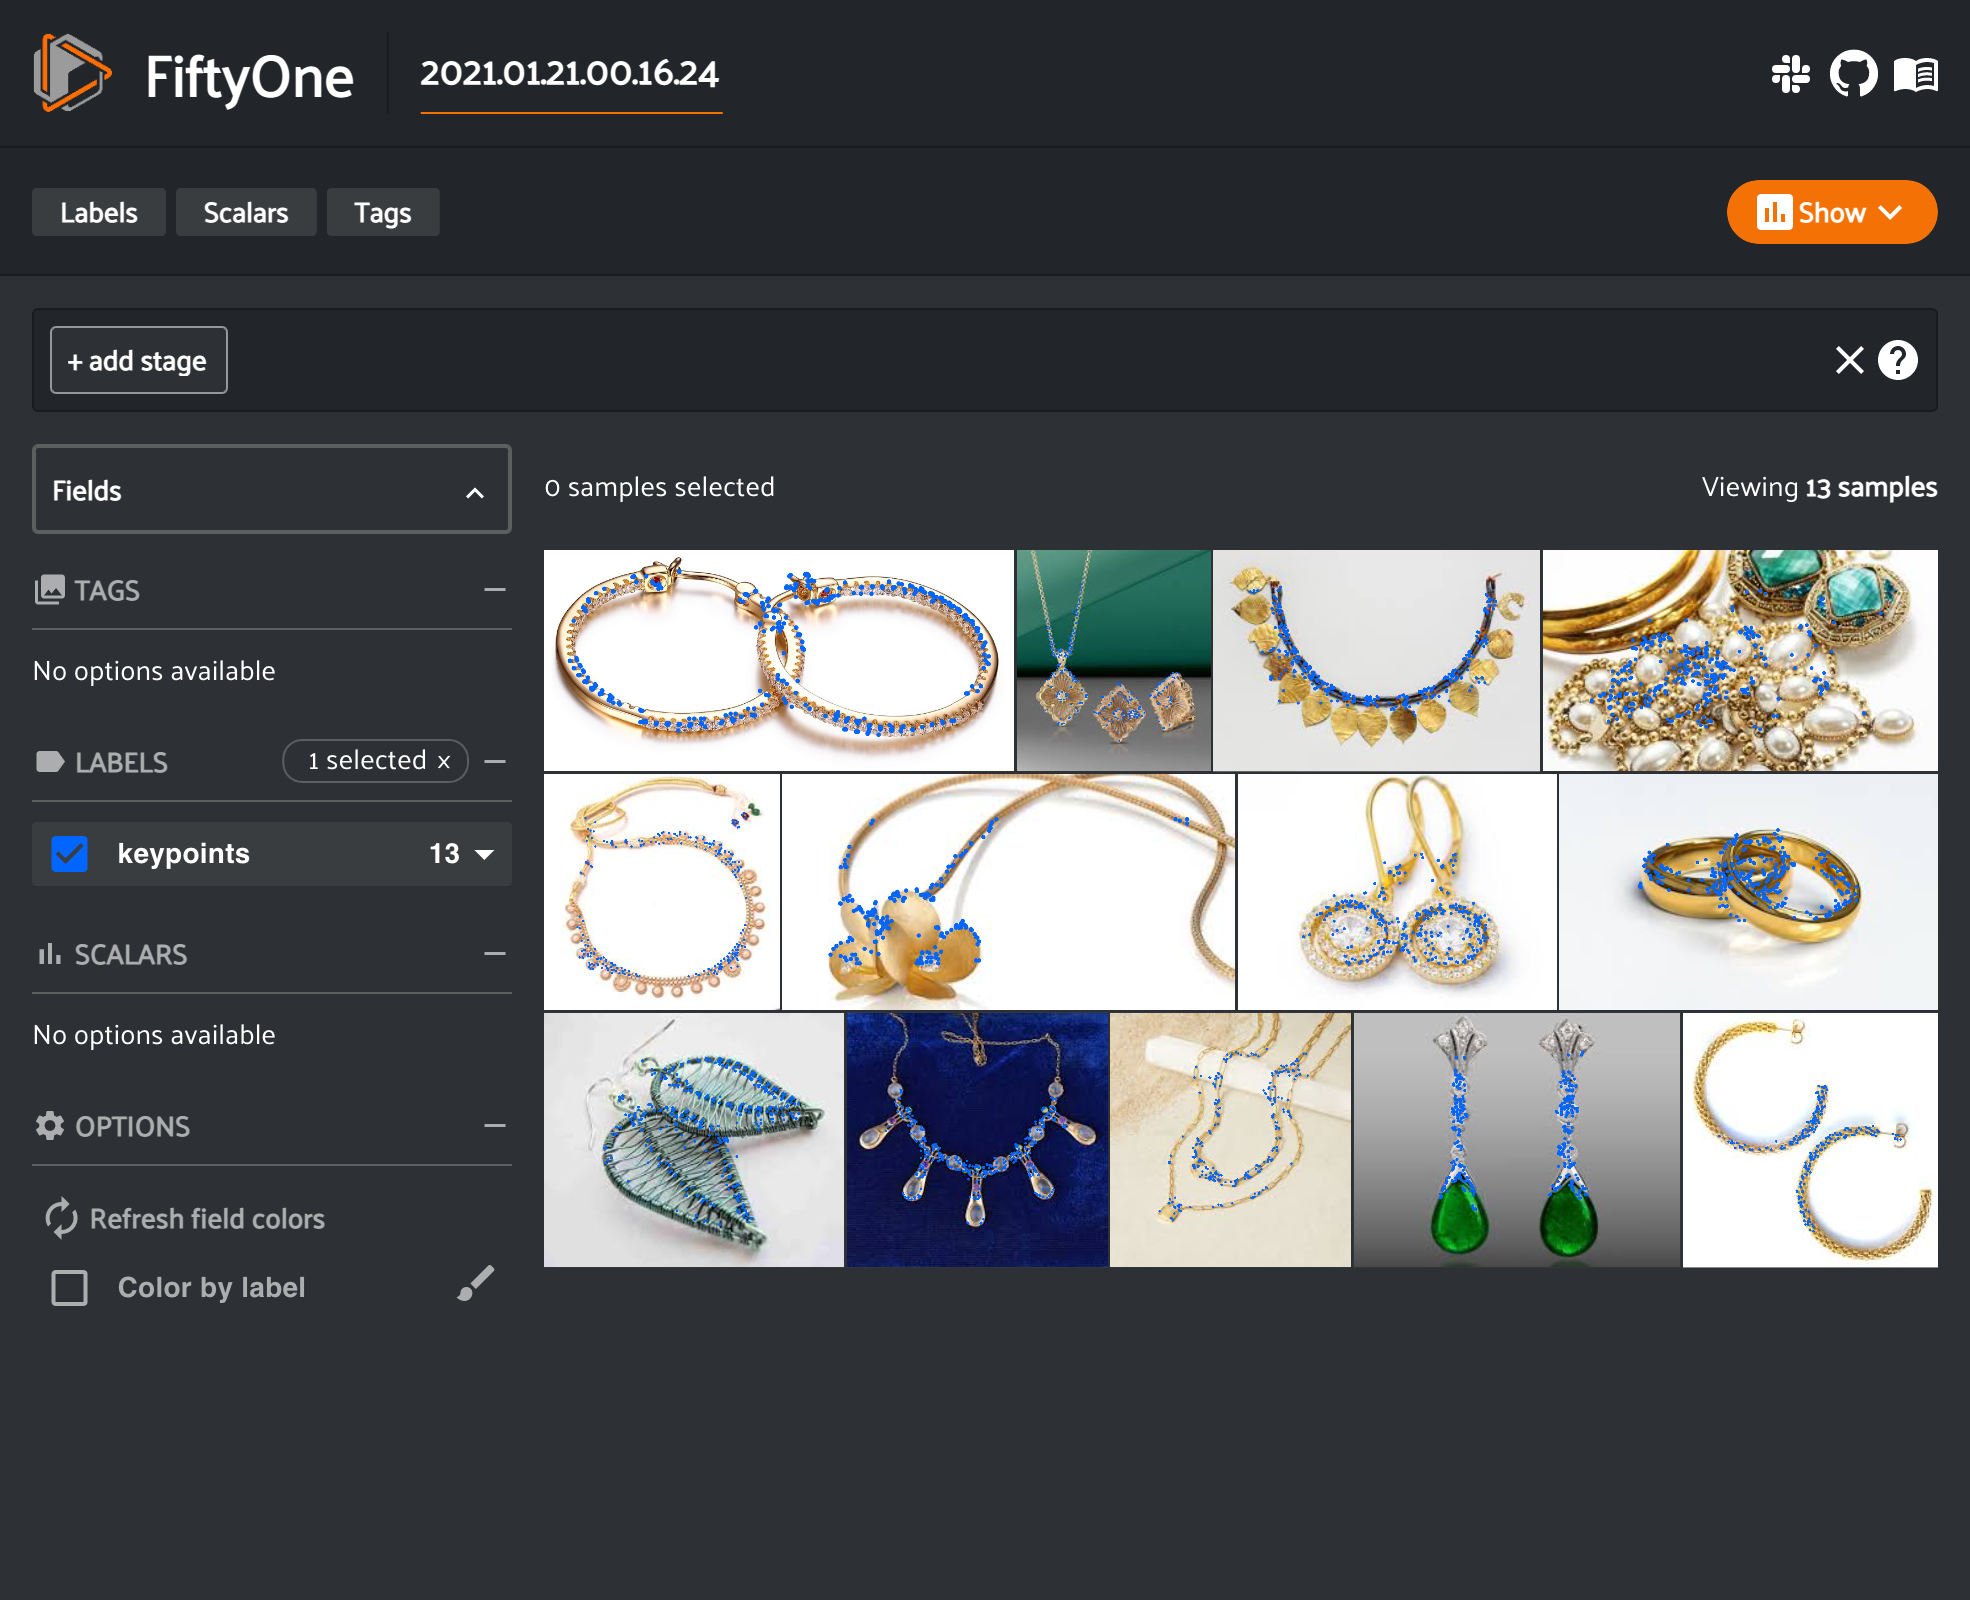

In [8]:
session = fo.launch_app(dataset)

You can double-click on an image to expand it:


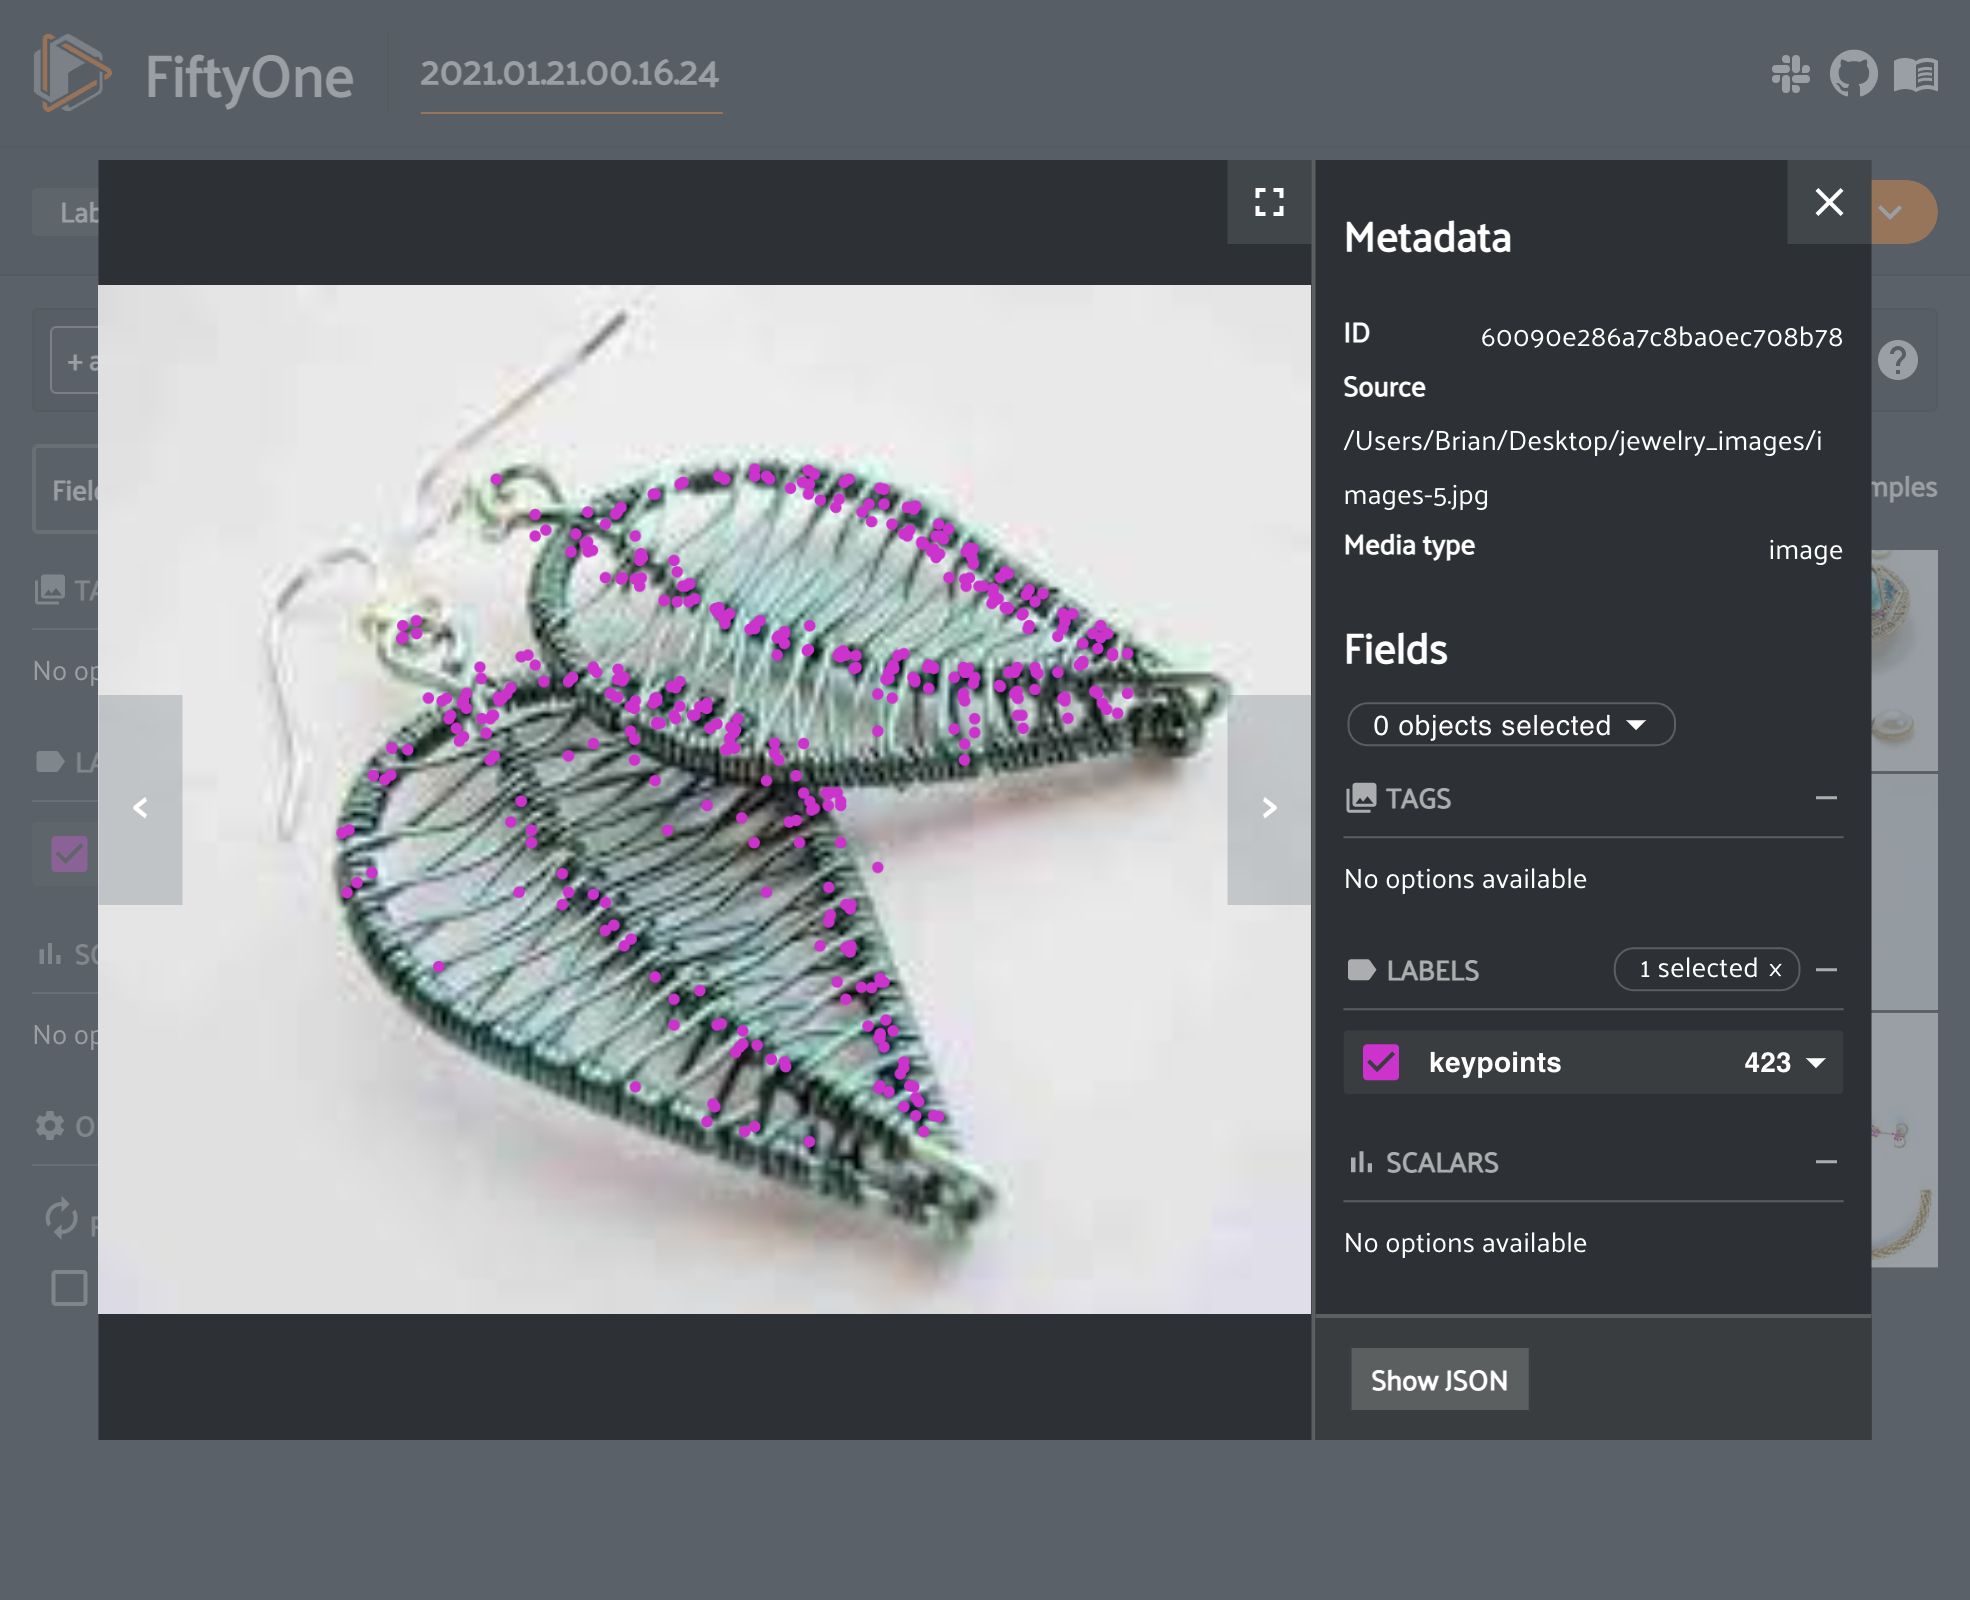

In [11]:
session.show()

In [12]:
session.freeze()  # freeze App to enable notebook sharing